<a href="https://colab.research.google.com/github/ak224001/Traffic-Signs-Recognition-deep-learning/blob/master/Traffic_Signs_Recognition_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Colab library to upload files to notebook
from google.colab import files

# Install Kaggle library
!pip install -q kaggle

In [2]:
# Upload kaggle API key file
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [0]:
! mkdir ~/.kaggle

In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

Uninstalling kaggle-1.5.6:
  Successfully uninstalled kaggle-1.5.6
     |████████████████████████████████| 1.4MB 4.8MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=74031bbc52348a199db2940438fe2f407d86708ef3bf13efdb798fc3a34601f8
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle
Kaggle API 1.5.6


In [7]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

 98% 598M/612M [00:07<00:00, 89.3MB/s]
100% 612M/612M [00:07<00:00, 89.7MB/s]


In [0]:
!unzip gtsrb-german-traffic-sign.zip

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,MaxPooling2D,Conv2D,Flatten,Dropout

In [0]:
train_data = []
labels = []
classes = 43
cur_path = os.getcwd()
for i in range(classes):
  path = os.path.join(cur_path,"train",str(i))
  images = os.listdir(path)
  for img in images:
    try:
      image = Image.open(path+"//"+img)
      image = image.resize((30,30))
      image = np.array(image)
      train_data.append(image)
      labels.append(i)
    except:
      print("Error loading Image")

In [0]:
X_train,X_test,y_train,y_test = train_test_split(train_data,labels,test_size=.2,random_state =42,shuffle=True)

In [13]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

31367 7842 31367 7842


In [0]:
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [0]:
X_train = np.asarray(X_train)

In [16]:
X_train.shape

(31367, 30, 30, 3)

In [0]:
X_test = np.asarray(X_test)

In [0]:
X_train  = X_train/255.
X_test = X_test/255.

In [0]:
model = Sequential()

model.add(Conv2D(32, (5, 5), padding='same', activation='relu',input_shape=X_train.shape[1:]))
model.add(Conv2D(32, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(43, activation="softmax"))
    
model.compile(loss='categorical_crossentropy',
            optimizer="adam",
            metrics=['accuracy'])

In [20]:
epochs = 15
history = model.fit(X_train,y_train, batch_size = 64, epochs=epochs,
		validation_data=(X_test,y_test), verbose=1)

Epoch 1/15
491/491 [==============================] - 4s 8ms/step - loss: 1.7122 - accuracy: 0.5168 - val_loss: 0.2682 - val_accuracy: 0.9304
Epoch 2/15
491/491 [==============================] - 4s 7ms/step - loss: 0.2980 - accuracy: 0.9088 - val_loss: 0.0821 - val_accuracy: 0.9802
Epoch 3/15
491/491 [==============================] - 4s 8ms/step - loss: 0.1536 - accuracy: 0.9529 - val_loss: 0.0320 - val_accuracy: 0.9920
Epoch 4/15
491/491 [==============================] - 4s 7ms/step - loss: 0.1096 - accuracy: 0.9664 - val_loss: 0.0297 - val_accuracy: 0.9921
Epoch 5/15
491/491 [==============================] - 4s 7ms/step - loss: 0.0840 - accuracy: 0.9743 - val_loss: 0.0235 - val_accuracy: 0.9931
Epoch 6/15
491/491 [==============================] - 4s 7ms/step - loss: 0.0664 - accuracy: 0.9789 - val_loss: 0.0184 - val_accuracy: 0.9964
Epoch 7/15
491/491 [==============================] - 4s 7ms/step - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0195 - val_accuracy: 0.9955
Epoch 

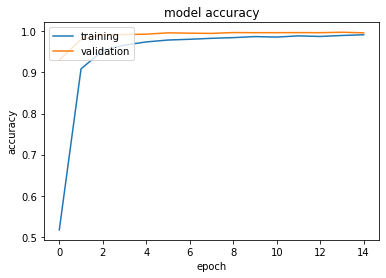

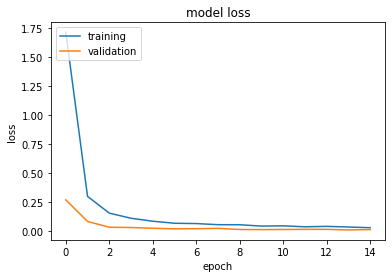

In [21]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [0]:
from sklearn.metrics import accuracy_score
import pandas as pd
test_Csv = pd.read_csv('/content/Test.csv')

In [23]:
test_Csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [0]:
test_labels = test_Csv["ClassId"].values

In [0]:
imgs = test_Csv["Path"].values

In [0]:
test_data=[]
for i in imgs:
  image = Image.open(i)
  image = image.resize((30,30))
  test_data.append(np.array(image))

test_data = np.asarray(test_data)

In [0]:
pred = model.predict(test_data)

In [28]:
predict = model.predict_classes(test_data)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [29]:
pred

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [30]:
predict

array([16,  1, 38, ..., 32,  7, 10])

In [31]:
accuracy_score(test_labels,predict)

0.9593032462391132

# Transfer learning